In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

---

The get dataset names gives us the inbuilt dataset names

In [3]:
sns.get_dataset_names()

['anagrams',
 'anscombe',
 'attention',
 'brain_networks',
 'car_crashes',
 'diamonds',
 'dots',
 'dowjones',
 'exercise',
 'flights',
 'fmri',
 'geyser',
 'glue',
 'healthexp',
 'iris',
 'mpg',
 'penguins',
 'planets',
 'seaice',
 'taxis',
 'tips',
 'titanic']

---

The load datasets help us load the dataset from the net

In [4]:
df = sns.load_dataset('flights')
df.head(5)

,year,month,passengers
0,1949,Jan,112
1,1949,Feb,118
2,1949,Mar,132
3,1949,Apr,129
4,1949,May,121


In [5]:
df['YM'] = "01-" + df['month'].astype(str) + "-" +  df['year'].astype(str)
df.head()

,year,month,passengers,YM
0,1949,Jan,112,01-Jan-1949
1,1949,Feb,118,01-Feb-1949
2,1949,Mar,132,01-Mar-1949
3,1949,Apr,129,01-Apr-1949
4,1949,May,121,01-May-1949


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144 entries, 0 to 143
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   year        144 non-null    int64   
 1   month       144 non-null    category
 2   passengers  144 non-null    int64   
 3   YM          144 non-null    object  
dtypes: category(1), int64(2), object(1)
memory usage: 4.0+ KB


In [7]:
df['YM'] = pd.to_datetime("01-" + df['month'].astype(str) + "-" +  df['year'].astype(str))
df.set_index('YM', inplace= True)
df.head(5)

,year,month,passengers
YM,,,
1949-01-01,1949,Jan,112
1949-02-01,1949,Feb,118
1949-03-01,1949,Mar,132
1949-04-01,1949,Apr,129
1949-05-01,1949,May,121


---

Plotting the graph 

<Axes: xlabel='YM', ylabel='passengers'>

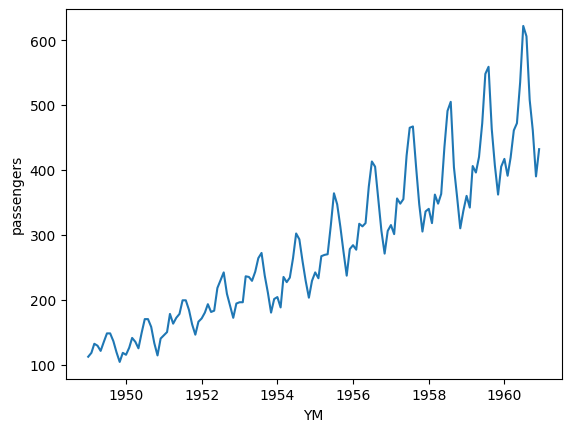

In [8]:
sns.lineplot(data = df, x = df.index, y = df.passengers)

---

To check for stationarity:

1) ADF Test

In [9]:
df['rollMean'] = df.passengers.rolling(window = 12).mean()
df['rollStd'] = df.passengers.rolling(window = 12).std()

<Axes: xlabel='YM', ylabel='passengers'>

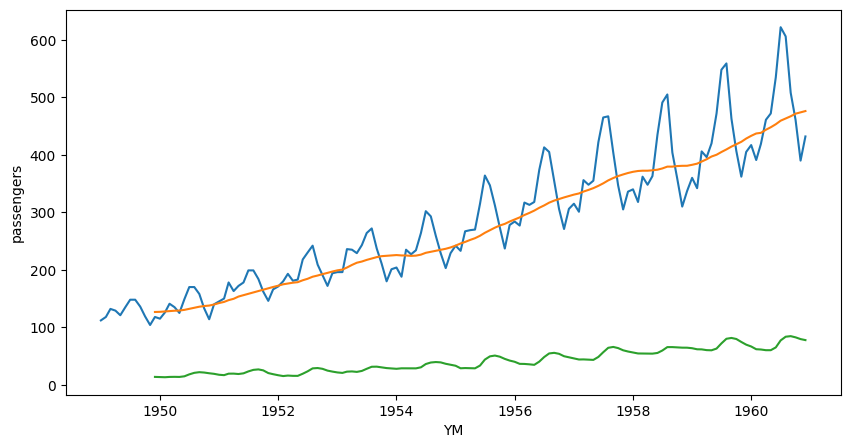

In [10]:
plt.figure(figsize= ( 10, 5))
sns.lineplot(data = df, x = df.index, y = df.passengers)
sns.lineplot(data = df, x = df.index, y = df.rollMean)
sns.lineplot(data = df, x = df.index, y = df.rollStd)

----

Performing the ADF Test

In [11]:
from statsmodels.tsa.stattools import adfuller

In [12]:
adf = adfuller(df['passengers'], autolag = 'AIC')
adf

(0.8153688792060482,
 0.991880243437641,
 13,
 130,
 {'1%': -3.4816817173418295,
  '5%': -2.8840418343195267,
  '10%': -2.578770059171598},
 996.692930839019)

---

The 4 main values of the ADF Test are :
- Test Statistics
- p-value
- Lags Used
- No. of observations used

In [13]:
adf[0:4]

(0.8153688792060482, 0.991880243437641, 13, 130)

---

Test statistics should be less than the critical value

---

How to make the data stationary:

1. Timeshift
2. log
3. Sqrt

The sequence does not matter, but Timeshift is generally the easiest

There can also be combinations, such as Timeshift of the log, or taking log of the Sqrt

---

In [14]:
def test_stationarity(df, var):
    df['rollMean'] = df[var].rolling(window = 12).mean()
    df['rollStd'] = df[var].rolling(window = 12).std()

    from statsmodels.tsa.stattools import adfuller
    adf = adfuller(df[var], autolag = 'AIC')
    stats = pd.Series(adf[0:4], index = ['Test Statistic', 'p-value', 'Lags used', 'Number of observations used'])
    print(stats)
    print()

    for key, values in adf[4].items():
        print("Criticality", key, ":", values)

    sns.lineplot(data = df, x = df.index, y = df[var])
    sns.lineplot(data = df, x = df.index, y = df.rollMean)
    sns.lineplot(data = df, x = df.index, y = df.rollStd)

In [15]:
df.head(5)

,year,month,passengers,rollMean,rollStd
YM,,,,,
1949-01-01,1949,Jan,112,NaN,NaN
1949-02-01,1949,Feb,118,NaN,NaN
1949-03-01,1949,Mar,132,NaN,NaN
1949-04-01,1949,Apr,129,NaN,NaN
1949-05-01,1949,May,121,NaN,NaN


Test Statistic                   0.815369
p-value                          0.991880
Lags used                       13.000000
Number of observations used    130.000000
dtype: float64

Criticality 1% : -3.4816817173418295
Criticality 5% : -2.8840418343195267
Criticality 10% : -2.578770059171598


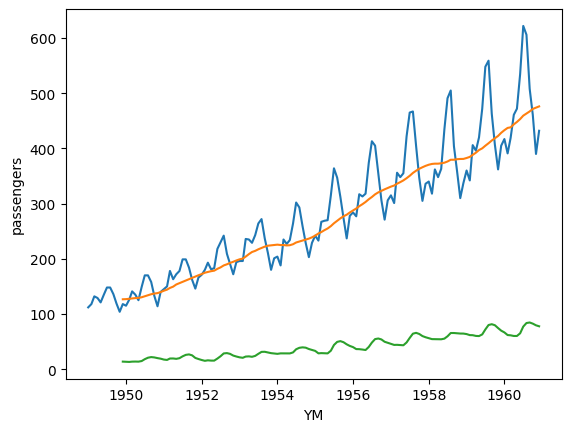

In [16]:
test_stationarity(df, 'passengers')

---

In [17]:
air_df = df[['passengers']]

In [18]:
air_df['shift'] = air_df.passengers.shift()
air_df.head()

C:\Users\Aaryan\AppData\Local\Temp\ipykernel_22372\3965989875.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  air_df['shift'] = air_df.passengers.shift()


,passengers,shift
YM,,
1949-01-01,112,NaN
1949-02-01,118,112.0
1949-03-01,132,118.0
1949-04-01,129,132.0
1949-05-01,121,129.0


---

In [19]:
air_df['Shift By Diff'] = air_df.passengers - air_df['shift']
air_df.head()

C:\Users\Aaryan\AppData\Local\Temp\ipykernel_22372\151996328.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  air_df['Shift By Diff'] = air_df.passengers - air_df['shift']


,passengers,shift,Shift By Diff
YM,,,
1949-01-01,112,NaN,NaN
1949-02-01,118,112.0,6.0
1949-03-01,132,118.0,14.0
1949-04-01,129,132.0,-3.0
1949-05-01,121,129.0,-8.0


C:\Users\Aaryan\AppData\Local\Temp\ipykernel_22372\2290601235.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['rollMean'] = df[var].rolling(window = 12).mean()
C:\Users\Aaryan\AppData\Local\Temp\ipykernel_22372\2290601235.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['rollStd'] = df[var].rolling(window = 12).std()


Test Statistic                  -2.829267
p-value                          0.054213
Lags used                       12.000000
Number of observations used    130.000000
dtype: float64

Criticality 1% : -3.4816817173418295
Criticality 5% : -2.8840418343195267
Criticality 10% : -2.578770059171598


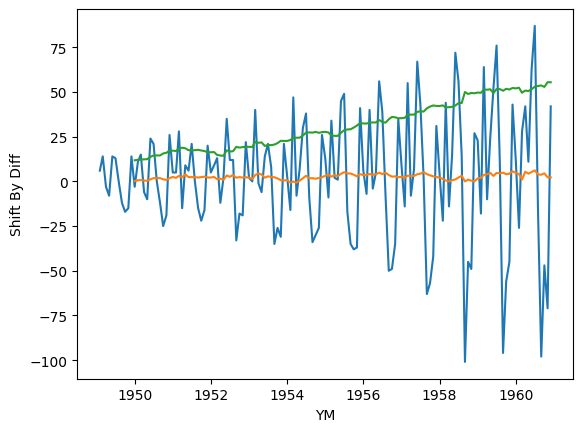

In [20]:
test_stationarity(air_df.dropna(), 'Shift By Diff')

----

Log Transformation

In [21]:
log_df = df[['passengers']]
log_df.head()

,passengers
YM,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121


In [22]:
log_df['log'] = np.log(log_df['passengers'])
log_df.head()

C:\Users\Aaryan\AppData\Local\Temp\ipykernel_22372\1412135348.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  log_df['log'] = np.log(log_df['passengers'])


,passengers,log
YM,,
1949-01-01,112,4.718499
1949-02-01,118,4.770685
1949-03-01,132,4.882802
1949-04-01,129,4.859812
1949-05-01,121,4.795791


C:\Users\Aaryan\AppData\Local\Temp\ipykernel_22372\2290601235.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['rollMean'] = df[var].rolling(window = 12).mean()
C:\Users\Aaryan\AppData\Local\Temp\ipykernel_22372\2290601235.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['rollStd'] = df[var].rolling(window = 12).std()


Test Statistic                  -1.717017
p-value                          0.422367
Lags used                       13.000000
Number of observations used    130.000000
dtype: float64

Criticality 1% : -3.4816817173418295
Criticality 5% : -2.8840418343195267
Criticality 10% : -2.578770059171598


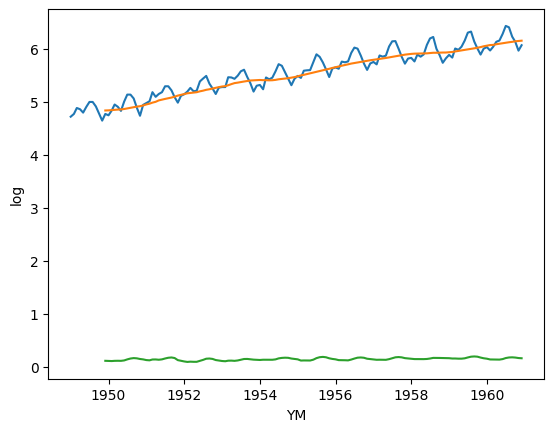

In [23]:
test_stationarity(log_df, 'log')

In [24]:
sqrt_df = df[['passengers']]
sqrt_df['sqrt'] = np.sqrt(df['passengers'])
sqrt_df.head()

C:\Users\Aaryan\AppData\Local\Temp\ipykernel_22372\2486983579.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sqrt_df['sqrt'] = np.sqrt(df['passengers'])


,passengers,sqrt
YM,,
1949-01-01,112,10.583005
1949-02-01,118,10.862780
1949-03-01,132,11.489125
1949-04-01,129,11.357817
1949-05-01,121,11.000000


C:\Users\Aaryan\AppData\Local\Temp\ipykernel_22372\2290601235.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['rollMean'] = df[var].rolling(window = 12).mean()
C:\Users\Aaryan\AppData\Local\Temp\ipykernel_22372\2290601235.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['rollStd'] = df[var].rolling(window = 12).std()


Test Statistic                  -0.345854
p-value                          0.918754
Lags used                       13.000000
Number of observations used    130.000000
dtype: float64

Criticality 1% : -3.4816817173418295
Criticality 5% : -2.8840418343195267
Criticality 10% : -2.578770059171598


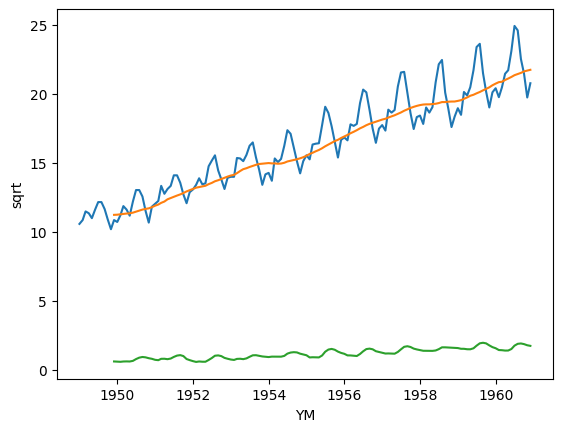

In [25]:
test_stationarity(sqrt_df, 'sqrt')

----

In [26]:
cbrt_df = df[['passengers']]
cbrt_df['cbrt'] = np.cbrt(df['passengers'])
cbrt_df.head()

C:\Users\Aaryan\AppData\Local\Temp\ipykernel_22372\1590778761.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cbrt_df['cbrt'] = np.cbrt(df['passengers'])


,passengers,cbrt
YM,,
1949-01-01,112,4.820285
1949-02-01,118,4.904868
1949-03-01,132,5.091643
1949-04-01,129,5.052774
1949-05-01,121,4.946087


C:\Users\Aaryan\AppData\Local\Temp\ipykernel_22372\2290601235.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['rollMean'] = df[var].rolling(window = 12).mean()
C:\Users\Aaryan\AppData\Local\Temp\ipykernel_22372\2290601235.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['rollStd'] = df[var].rolling(window = 12).std()


Test Statistic                  -0.810035
p-value                          0.816157
Lags used                       13.000000
Number of observations used    130.000000
dtype: float64

Criticality 1% : -3.4816817173418295
Criticality 5% : -2.8840418343195267
Criticality 10% : -2.578770059171598


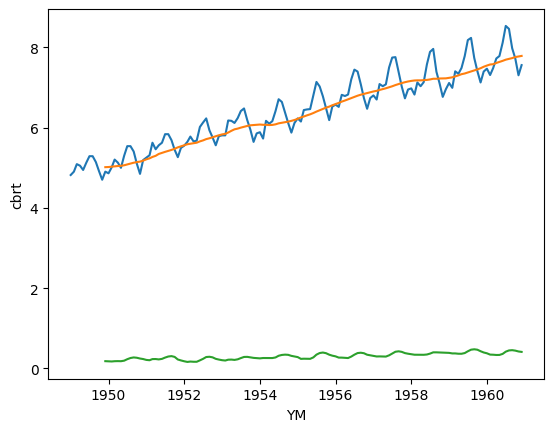

In [27]:
test_stationarity(cbrt_df, 'cbrt')

----

In [28]:
sqrt_log_df = log_df[['passengers', 'log']]
sqrt_log_df['log'] = np.sqrt(log_df['log'])
sqrt_log_df.head()

C:\Users\Aaryan\AppData\Local\Temp\ipykernel_22372\1508195444.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sqrt_log_df['log'] = np.sqrt(log_df['log'])


,passengers,log
YM,,
1949-01-01,112,2.172211
1949-02-01,118,2.184190
1949-03-01,132,2.209706
1949-04-01,129,2.204498
1949-05-01,121,2.189929


C:\Users\Aaryan\AppData\Local\Temp\ipykernel_22372\2290601235.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['rollMean'] = df[var].rolling(window = 12).mean()


Test Statistic                  -1.942528
p-value                          0.312326
Lags used                       13.000000
Number of observations used    130.000000
dtype: float64

Criticality 1% : -3.4816817173418295
Criticality 5% : -2.8840418343195267
Criticality 10% : -2.578770059171598


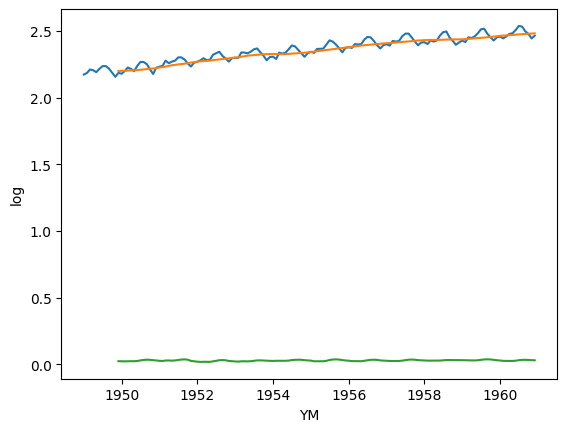

In [29]:
test_stationarity(sqrt_log_df, 'log')

---

In [30]:
log_shift_df = log_df[['passengers', 'log']]
log_shift_df['Log Sqrt'] = np.sqrt(np.log(log_df['passengers']))
log_shift_df['log Shift Diff'] = log_shift_df['Log Sqrt'] - log_shift_df['Log Sqrt'].shift() 
log_shift_df.head()

C:\Users\Aaryan\AppData\Local\Temp\ipykernel_22372\4269411905.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  log_shift_df['Log Sqrt'] = np.sqrt(np.log(log_df['passengers']))


,passengers,log,Log Sqrt,log Shift Diff
YM,,,,
1949-01-01,112,4.718499,2.172211,NaN
1949-02-01,118,4.770685,2.184190,0.011979
1949-03-01,132,4.882802,2.209706,0.025517
1949-04-01,129,4.859812,2.204498,-0.005208
1949-05-01,121,4.795791,2.189929,-0.014569


C:\Users\Aaryan\AppData\Local\Temp\ipykernel_22372\2290601235.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['rollMean'] = df[var].rolling(window = 12).mean()
C:\Users\Aaryan\AppData\Local\Temp\ipykernel_22372\2290601235.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['rollStd'] = df[var].rolling(window = 12).std()


Test Statistic                  -2.611019
p-value                          0.090741
Lags used                       14.000000
Number of observations used    128.000000
dtype: float64

Criticality 1% : -3.4825006939887997
Criticality 5% : -2.884397984161377
Criticality 10% : -2.578960197753906


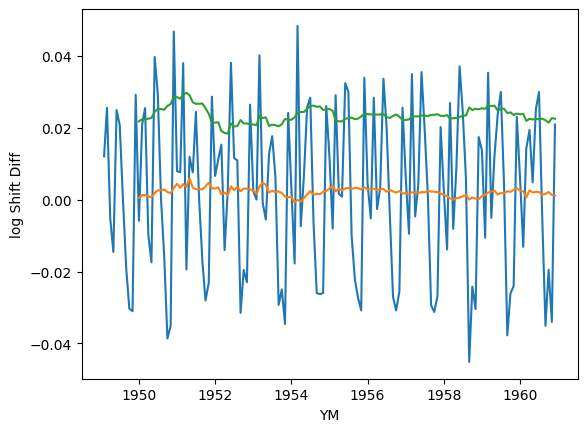

In [31]:
test_stationarity(log_shift_df.dropna(), 'log Shift Diff')

----

In [32]:
shift_1 = df.passengers.shift(2)
shift_1[''] = df.passengers.shift(2)
shift_1.head()

YM
1949-01-01      NaN
1949-02-01      NaN
1949-03-01    112.0
1949-04-01    118.0
1949-05-01    132.0
Name: passengers, dtype: object

In [33]:
shift_1['log'] = np.log(shift_1['passengers'])
shift_1.head()

KeyError: 'passengers'

In [36]:
airp = df[['passengers']].copy(deep = True)

In [37]:
airp.head()

,passengers
YM,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121


In [38]:
airp['Shift 1'] = airp['passengers'].diff()
airp.head()

,passengers,Shift 1
YM,,
1949-01-01,112,NaN
1949-02-01,118,6.0
1949-03-01,132,14.0
1949-04-01,129,-3.0
1949-05-01,121,-8.0


In [39]:
airp['Shift 2'] = airp['passengers'].diff(2)
airp.head()

,passengers,Shift 1,Shift 2
YM,,,
1949-01-01,112,NaN,NaN
1949-02-01,118,6.0,NaN
1949-03-01,132,14.0,20.0
1949-04-01,129,-3.0,11.0
1949-05-01,121,-8.0,-11.0


In [40]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

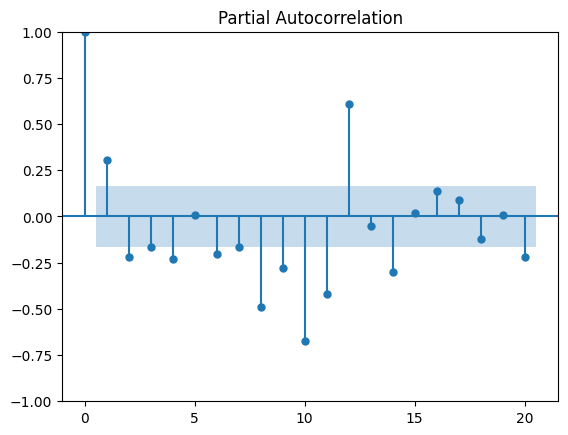

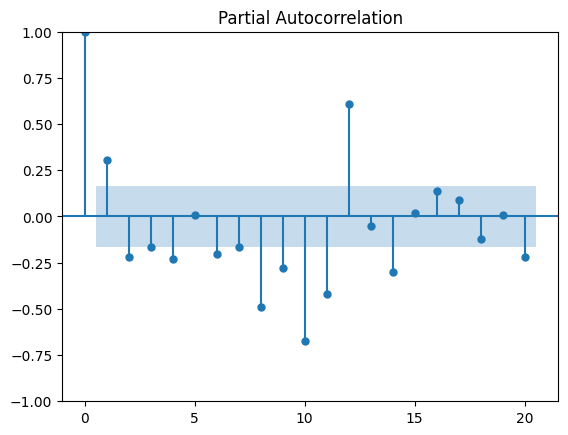

In [43]:
plot_pacf(airp['Shift 1'].dropna(), lags=20)

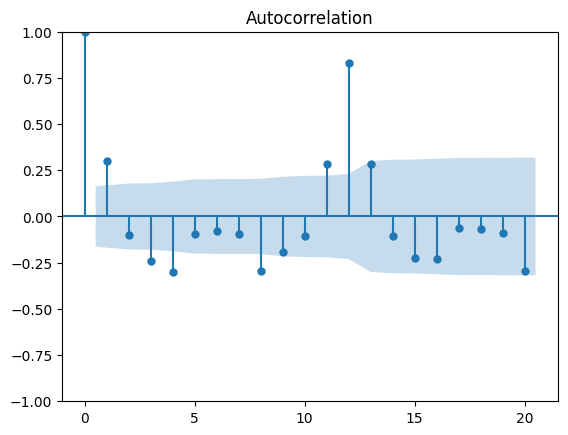

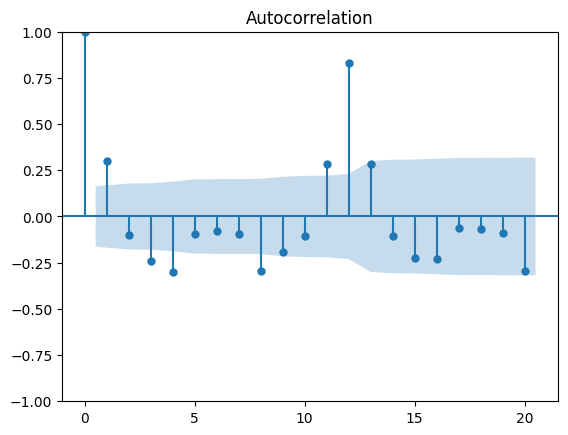

In [42]:
plot_acf(airp['Shift 1'].dropna(), lags=20)

In [44]:
len(airp)

144

In [45]:
train = airp[:round(len(airp)*70/100)]
train.head()

,passengers,Shift 1,Shift 2
YM,,,
1949-01-01,112,NaN,NaN
1949-02-01,118,6.0,NaN
1949-03-01,132,14.0,20.0
1949-04-01,129,-3.0,11.0
1949-05-01,121,-8.0,-11.0


In [46]:
train.tail()

,passengers,Shift 1,Shift 2
YM,,,
1957-01-01,315,9.0,44.0
1957-02-01,301,-14.0,-5.0
1957-03-01,356,55.0,41.0
1957-04-01,348,-8.0,47.0
1957-05-01,355,7.0,-1.0


In [49]:
test = airp[round(len(airp)*7/100):]
test.head()

,passengers,Shift 1,Shift 2
YM,,,
1949-11-01,104,-15.0,-32.0
1949-12-01,118,14.0,-1.0
1950-01-01,115,-3.0,11.0
1950-02-01,126,11.0,8.0
1950-03-01,141,15.0,26.0


In [50]:
from statsmodels.tsa.arima.model import ARIMA

In [51]:
order = (1,1,3)

model = ARIMA(train['passengers'], order=order)

model_fit = model.fit()

prediction = model_fit.predict(start = test.index[0], end = test.index[-1])

c:\Users\Aaryan\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\Aaryan\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\Aaryan\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
